# Brain Cancer Classification

## Importing Libraries

In [1]:
!pip install tensorflow

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import cv2

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
data = "data"
categories = os.listdir(data)
print("Categories found:", categories)

Categories found: ['brain_glioma', 'brain_menin', 'brain_tumor']


In [4]:
image_counts = {}
total_images = 0

for subclass in os.listdir(data):
    subclass_path = os.path.join(data, subclass)
    if os.path.isdir(subclass_path):
        num_images = len([
            f for f in os.listdir(subclass_path)
            if os.path.isfile(os.path.join(subclass_path, f))
        ])
        image_counts[subclass] = num_images
        total_images += num_images

print("Image counts in ALL subclasses:")
for subclass, count in image_counts.items():
    print(f"{subclass}: {count}")
print(f"\nTotal images in ALL: {total_images}")

Image counts in ALL subclasses:
brain_glioma: 5000
brain_menin: 5000
brain_tumor: 5000

Total images in ALL: 15000


In [5]:
X = []
y = []

img_size = 128  # You can increase to 150 or 224 later if your system can handle it

for label, category in enumerate(categories):
    folder_path = os.path.join(data, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            X.append(img)
            y.append(label)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")


In [6]:
# Convert to NumPy arrays
X = np.array(X).reshape(-1, img_size, img_size, 1)
X = X / 255.0

y = np.array(y)
y = to_categorical(y, num_classes=len(categories))

# Feedback and confirmation
print("✅ Data preprocessing complete!")
print(f"Shape of X: {X.shape}")  # e.g., (15000, 128, 128, 1)
print(f"Shape of y: {y.shape}")  # e.g., (15000, 3)

✅ Data preprocessing complete!
Shape of X: (15000, 128, 128, 1)
Shape of y: (15000, 3)


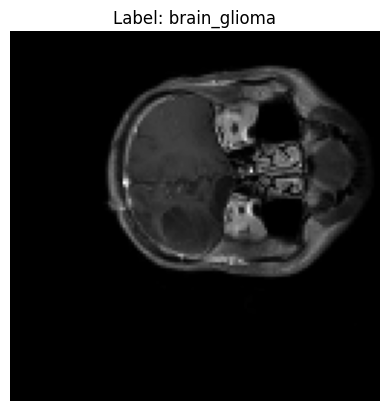

In [7]:
# Preview an example image and its label
index = 0
plt.imshow(X[index].reshape(img_size, img_size), cmap='gray')
plt.title(f"Label: {categories[np.argmax(y[index])]}")
plt.axis('off')
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data split complete!")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

✅ Data split complete!
Training samples: 12000
Testing samples: 3000
